## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [256]:
import pandas as pd
import numpy as np

In [257]:
data = {'國家': ['Taiwan','UnitedStates','Thailand'],
        '人口': [3000000,50000000,700000000]}
data = pd.DataFrame(data)

In [258]:
s=0
for i in range(len(data['國家'])):
    if data['人口'][i]>s:
        y=i
        s=data['人口'][i]
print('人口數最多的國家為',data['國家'][y])

人口數最多的國家為 Thailand


## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [259]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [260]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [261]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = ''

data = data.split()
print(len(data))

for i in range(10):
    if 'n00015388_' in data[i]:
        del data[i]

data[0:10]

20008


['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'http://www.porschemania.it/discus/messages/815/102099.jpg',
 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg']

## 將 txt 轉成 pandas dataframe

In [262]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,0
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [263]:
df = df.reset_index()

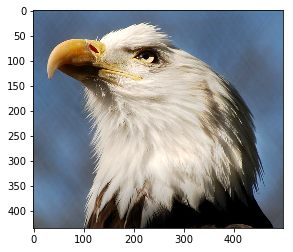

In [264]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,0]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

 Function 弄不起來QQ

In [265]:
def img2arr_fromURLs(url_list, resize= False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    #, resize = False

    response = requests.get(url_list)
    img_list = Image.open(BytesIO(response.content))

    return img_list

In [255]:
result = img2arr_fromURLs(df[0][0].values)#.values
#print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

#for im_get in result:
plt.imshow(result)
plt.show()

AttributeError: 'str' object has no attribute 'values'